## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load Files

#### Usage

In [2]:
df = pd.read_csv('Full Eletric Interval 042016.csv', skiprows = 4)

In [10]:
df.Usage = df.Usage.fillna(value=0)

In [19]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Start Time'])

#### Properties

In [3]:
df2 = pd.read_excel('SIMS_Property_List_4-6-2016.xlsx')

## Average cross-campus usage by time of day

In [11]:
timelst = []
for i in range(0, 48):
    tot = 0
    j = i
    while j < df.shape[0]:
        tot += df['Usage'][j]
        j += 48
    timelst.append(tot / 731)

In [12]:
times = []
for i in range(0,48):
    times.append(df['Start Time'][i])
dftime = pd.DataFrame(timelst, index = pd.Series(times))

## Cross-campus usage bar plot by time of day

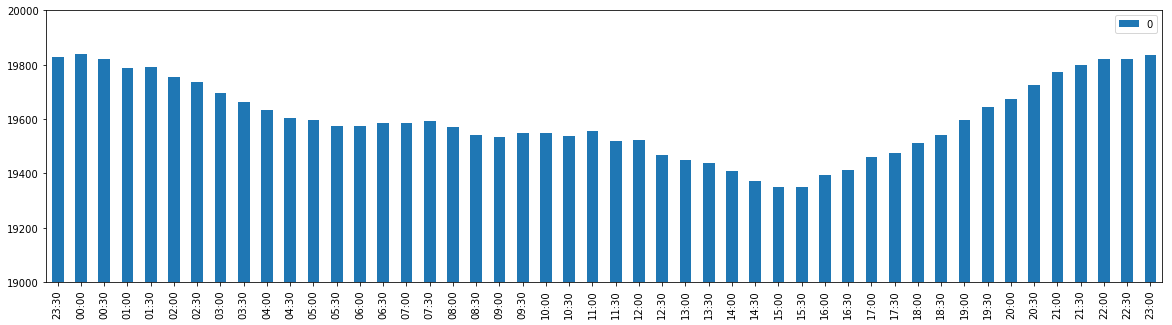

In [18]:
dftime.plot.bar(figsize=(20,5), ylim=(19000, 20000))

## Cross-campus usage data by day of week

In [20]:
dfweekdaytot = df
dfweekdaytot.Datetime = df.Datetime.dt.weekday

In [22]:
dfweekday = dfweekdaytot.groupby(['Datetime']).mean()

## Cross-campus usage bar plot by day of week

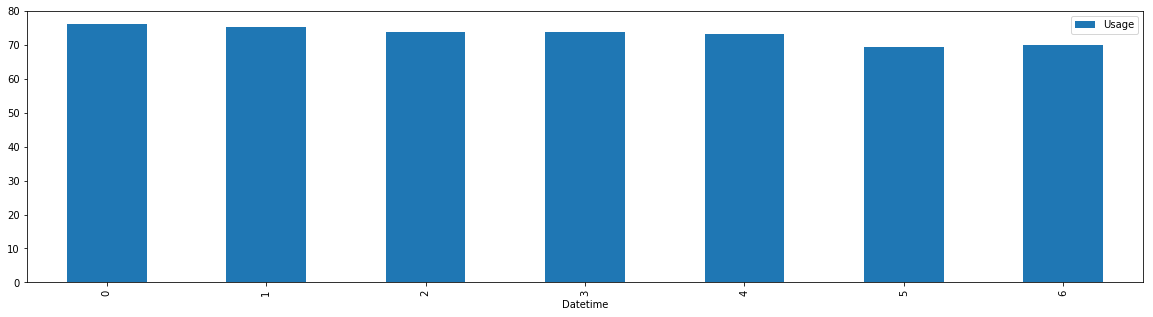

In [24]:
dfweekday.plot.bar(y='Usage', figsize=(20,5))